#Análise Exploratória dos Dados

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurações para os gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carregando o conjunto de dados
data = pd.read_csv('CAD.csv')

# Primeiras linhas do conjunto de dados
data.head()


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [4]:
# Informações básicas sobre o conjunto de dados
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [5]:
# Verifica a presença de valores ausentes
missing_values = data.isnull().sum()

missing_values


Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

* O conjunto de dados contém 303 registros e 55 colunas.
* Cada característica tem 303 registros não nulos, indicando que não há valores ausentes.
* Temos uma mistura de características numéricas e categóricas. As características numéricas são representadas como int64 ou float64, enquanto as características categóricas são representadas como object

In [6]:
# Estatísticas descritivas para as colunas numéricas
statistical_summary = data.describe()

statistical_summary


,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


* **Idade (Age):** A idade média dos pacientes é de cerca de 59 anos, com um mínimo de 30 e um máximo de 86 anos.
* **Peso (Weight):** O peso médio é de aproximadamente 74 kg, variando entre 48 kg e 120 kg.
* **Altura (Length):** A altura média é de cerca de 165 cm.
* **IMC (BMI):** O IMC médio é de aproximadamente 27.25, o que indica que, em média, os pacientes estão na categoria de sobrepeso.
* **Pressão Arterial (BP):** A pressão arterial média é de cerca de 130 mmHg.
* **Taxa de Pulso (PR):** O pulso médio está em torno de 74 ppm.
* **Glicemia em Jejum (FBS):** A glicemia média em jejum é de cerca de 86 mg/dl.

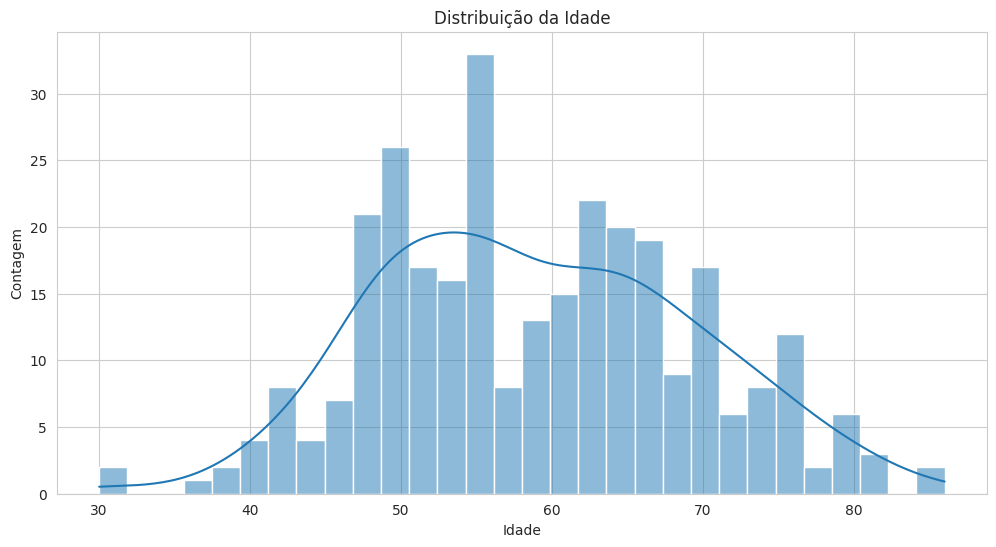

In [7]:
# Histograma da idade
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()


A distribuição da idade mostra que a maioria dos pacientes está na faixa dos 50 aos 70 anos, com um pico na faixa dos 60 anos. Há também uma quantidade significativa de pacientes nas faixas dos 40 e 70 anos

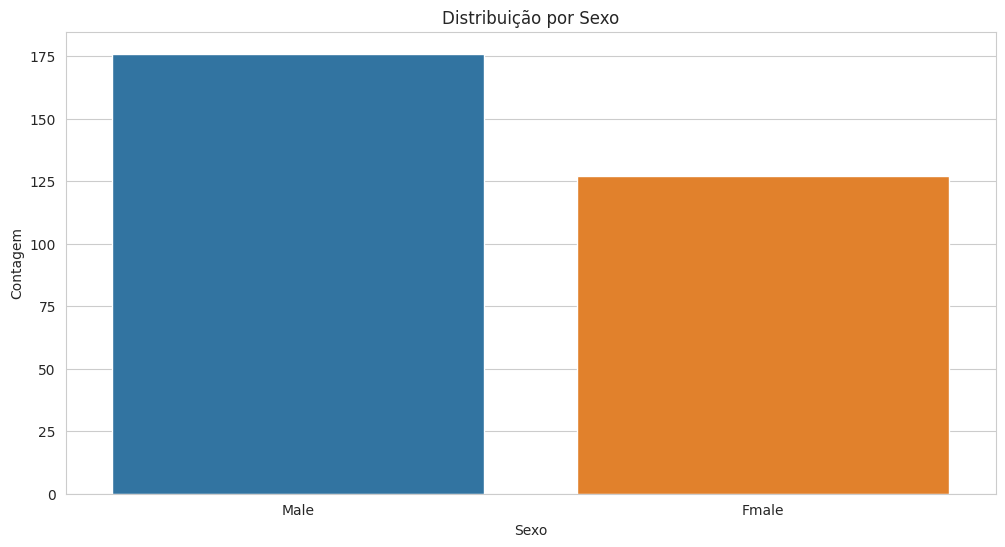

In [8]:
# Gráfico de barras para o sexo
sns.countplot(data=data, x='Sex')
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()


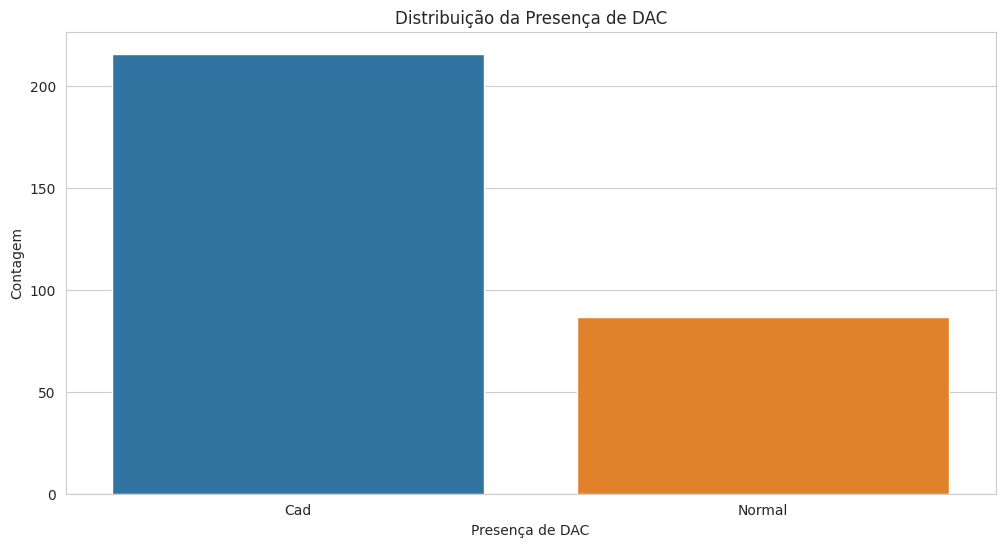

In [9]:
# Gráfico de barras para a presença de DAC
sns.countplot(data=data, x='Cath')
plt.title('Distribuição da Presença de DAC')
plt.xlabel('Presença de DAC')
plt.ylabel('Contagem')
plt.show()


A distribuição da presença de Doença Arterial Coronariana (DAC) indica que há mais pacientes com DAC ("Cad") do que aqueles que são normais ("Normal"). Isso é importante a considerar, pois indica um desequilíbrio nas classes, algo que pode ser relevante para treinar um modelo de aprendizado de máquina.

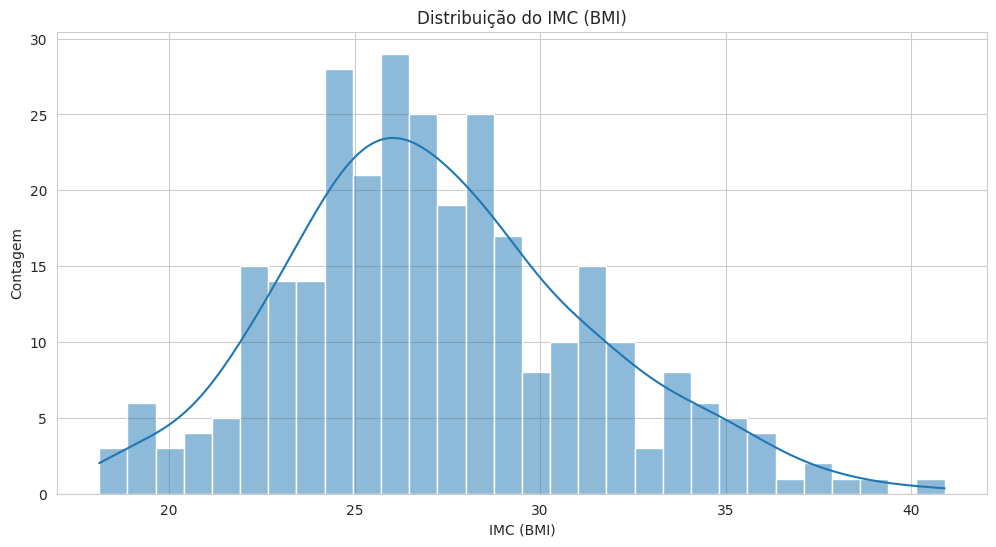

In [10]:
# Histograma do IMC
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title('Distribuição do IMC (BMI)')
plt.xlabel('IMC (BMI)')
plt.ylabel('Contagem')
plt.show()


A distribuição do IMC (Índice de Massa Corporal) mostra que a maioria dos pacientes tem um IMC entre 25 e 30, que é categorizado como sobrepeso. Há também uma quantidade significativa de pacientes com IMC acima de 30, que é considerado obeso. Ambos os sobrepeso e a obesidade são fatores de risco conhecidos para doenças cardíacas.

<ipython-input-11-16e024d8da31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


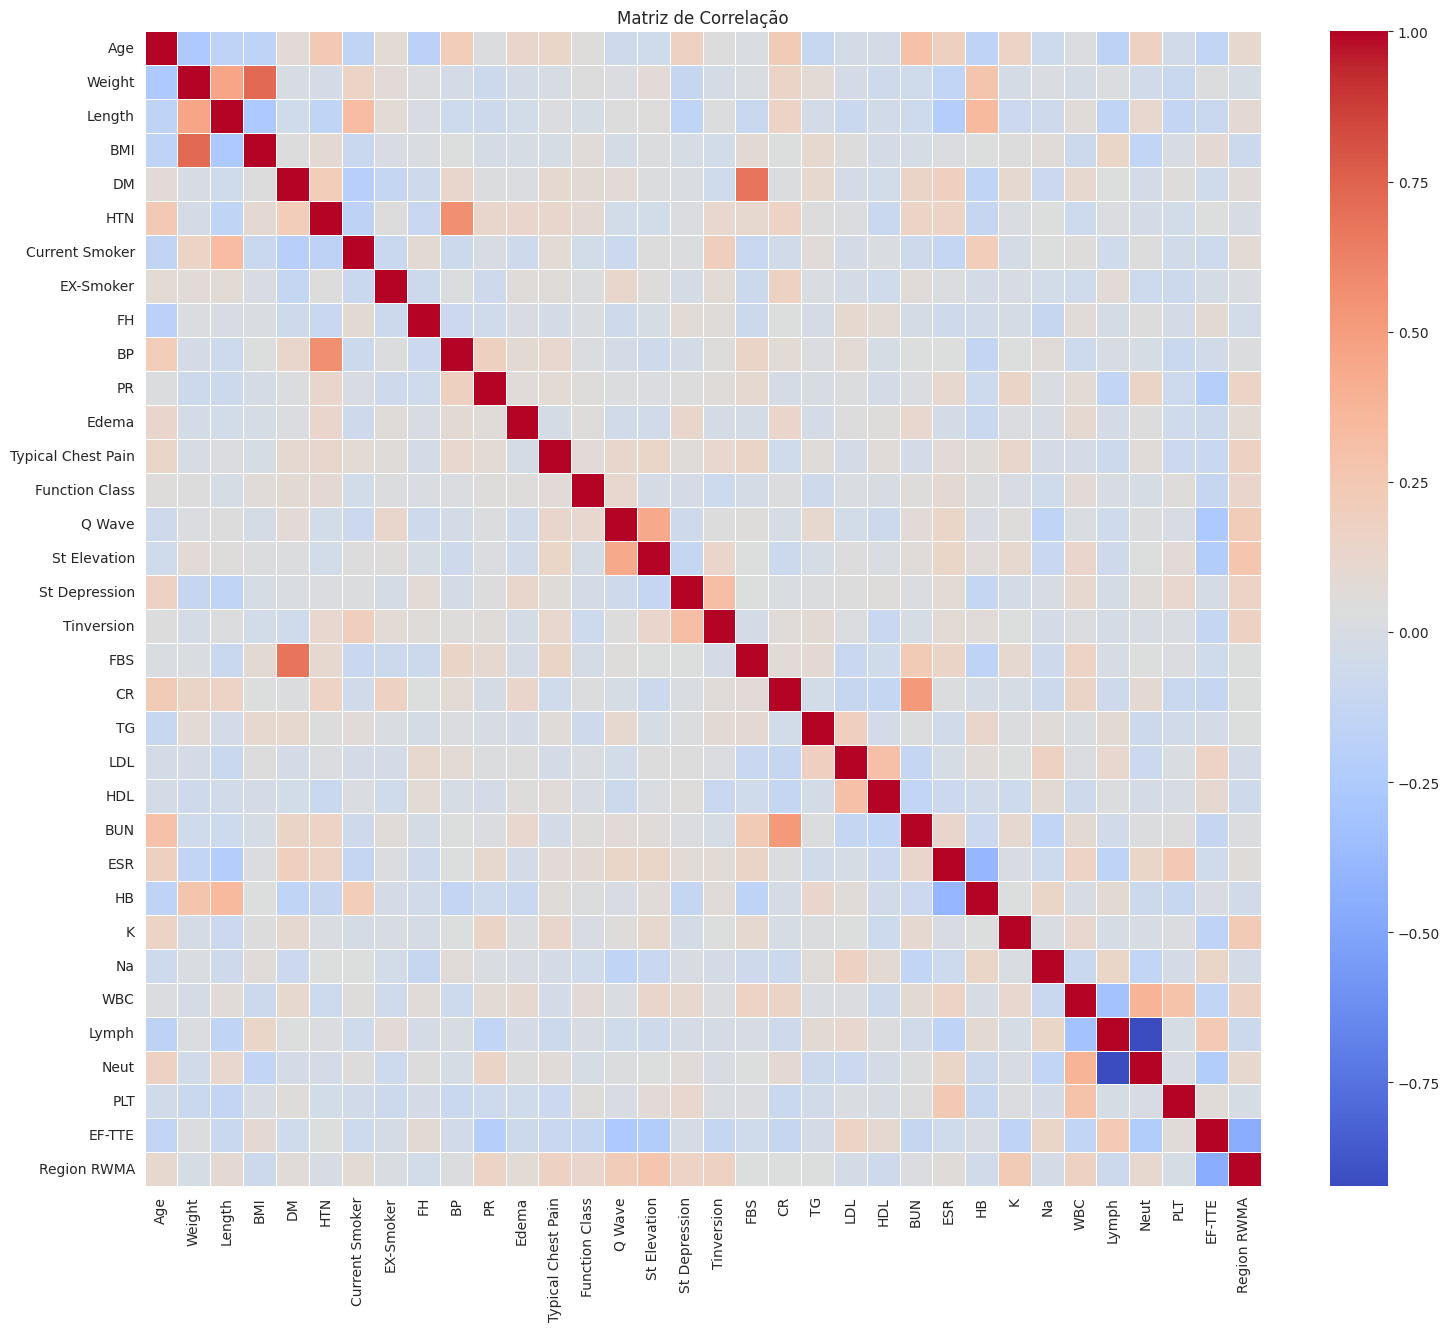

In [11]:
# Matriz de correlação
corr_matrix = data.corr()

# Visualizando a matriz de correlação usando um heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".1f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


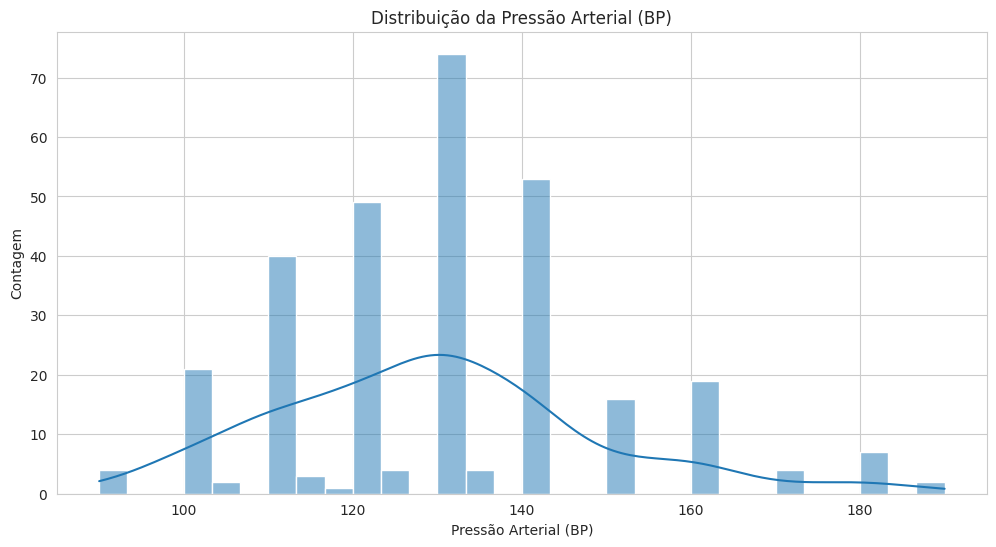

In [12]:
# Histograma da pressão arterial (BP)
sns.histplot(data['BP'], bins=30, kde=True)
plt.title('Distribuição da Pressão Arterial (BP)')
plt.xlabel('Pressão Arterial (BP)')
plt.ylabel('Contagem')
plt.show()


A distribuição da pressão arterial (BP) mostra que a maioria dos pacientes tem uma pressão arterial em torno de 120-140 mmHg. É importante notar que uma pressão arterial elevada é um fator de risco conhecido para doenças cardíacas.

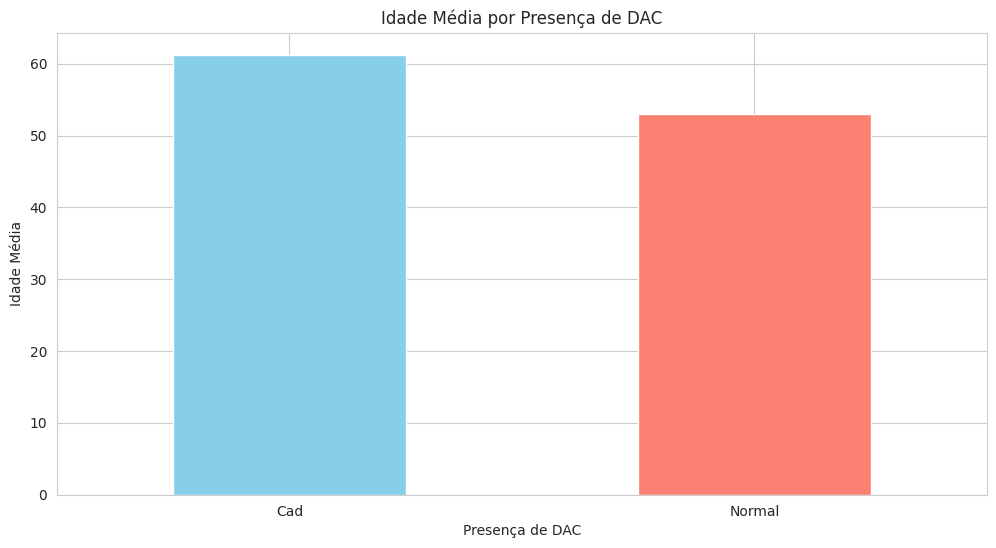

In [13]:
# Comparação da idade média entre pacientes com e sem DAC
age_comparison = data.groupby('Cath')['Age'].mean()

age_comparison.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Idade Média por Presença de DAC')
plt.xlabel('Presença de DAC')
plt.ylabel('Idade Média')
plt.xticks(rotation=0)
plt.show()


A idade média dos pacientes com DAC é visivelmente maior do que a dos pacientes sem DAC. Isso está alinhado com o entendimento de que a idade é um fator de risco para doenças cardíacas.

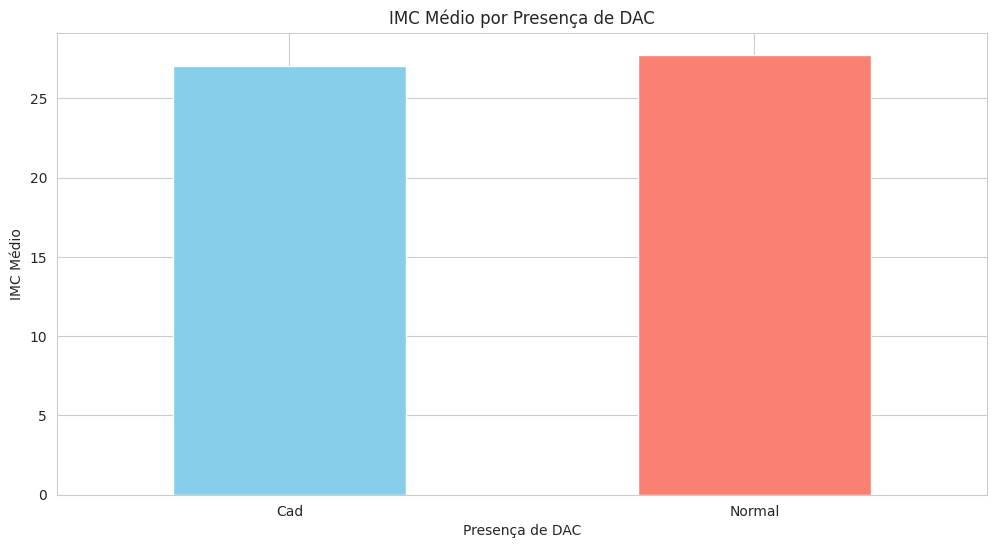

In [14]:
# Comparação do IMC médio entre pacientes com e sem DAC
bmi_comparison = data.groupby('Cath')['BMI'].mean()

bmi_comparison.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('IMC Médio por Presença de DAC')
plt.xlabel('Presença de DAC')
plt.ylabel('IMC Médio')
plt.xticks(rotation=0)
plt.show()


A média do IMC para ambos os grupos, pacientes com e sem DAC, é relativamente próxima. No entanto, em ambos os casos, o IMC médio está na faixa de sobrepeso (IMC entre 25 e 30). Isso sugere que o sobrepeso pode ser um fator comum entre os pacientes neste conjunto de dados.

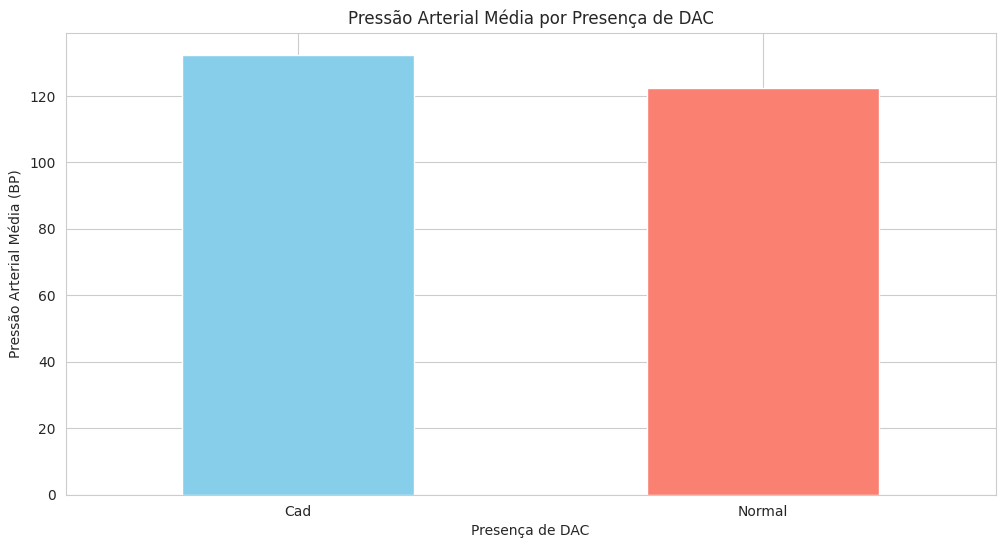

In [15]:
# Comparação da pressão arterial média entre pacientes com e sem DAC
bp_comparison = data.groupby('Cath')['BP'].mean()

bp_comparison.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Pressão Arterial Média por Presença de DAC')
plt.xlabel('Presença de DAC')
plt.ylabel('Pressão Arterial Média (BP)')
plt.xticks(rotation=0)
plt.show()


A pressão arterial média é ligeiramente maior em pacientes com DAC em comparação com aqueles que não têm. Isso está em linha com o entendimento de que a hipertensão (pressão arterial elevada) é um fator de risco para doenças cardíacas.

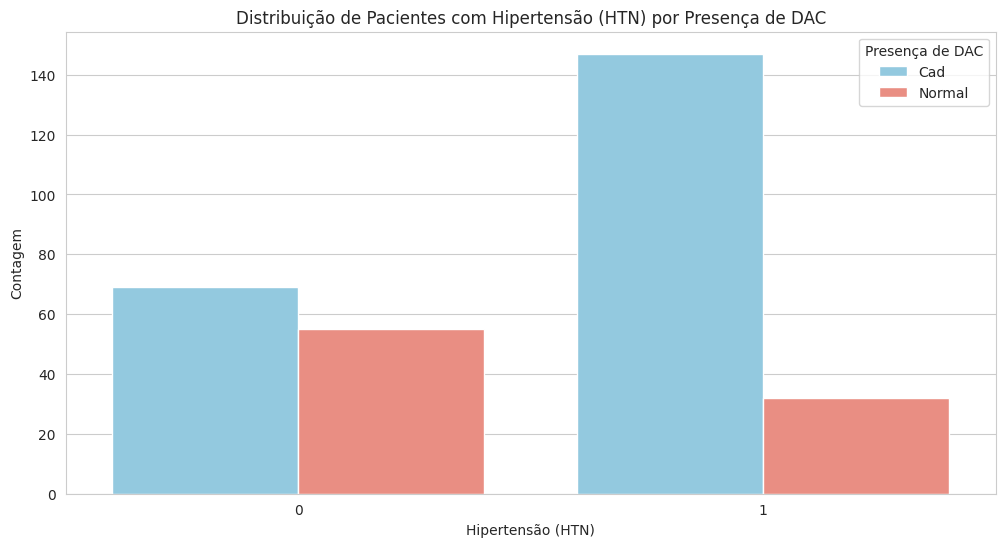

In [16]:
# Gráfico de barras para hipertensão (HTN) em relação à presença de DAC
sns.countplot(data=data, x='HTN', hue='Cath', palette=['skyblue', 'salmon'])
plt.title('Distribuição de Pacientes com Hipertensão (HTN) por Presença de DAC')
plt.xlabel('Hipertensão (HTN)')
plt.ylabel('Contagem')
plt.legend(title='Presença de DAC')
plt.show()


* Entre os pacientes que têm hipertensão (HTN = Yes), uma proporção significativa também tem DAC.
* Entre os pacientes que não têm hipertensão (HTN = No), a distribuição entre aqueles com e sem DAC é mais equilibrada.

Isso sugere que a hipertensão pode estar associada a um risco aumentado de DAC

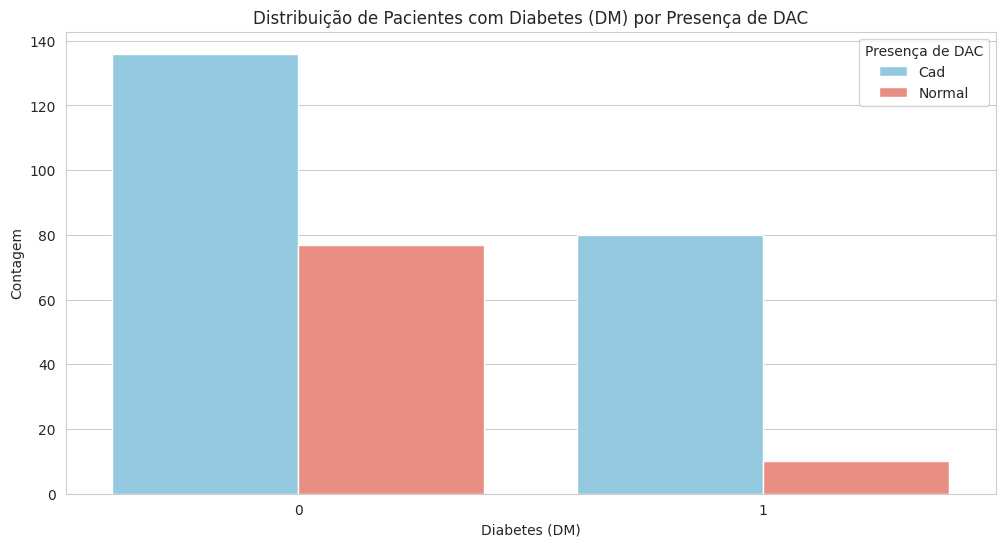

In [17]:
# Gráfico de barras para diabetes (DM) em relação à presença de DAC
sns.countplot(data=data, x='DM', hue='Cath', palette=['skyblue', 'salmon'])
plt.title('Distribuição de Pacientes com Diabetes (DM) por Presença de DAC')
plt.xlabel('Diabetes (DM)')
plt.ylabel('Contagem')
plt.legend(title='Presença de DAC')
plt.show()


* Entre os pacientes que têm diabetes (DM = Yes), uma proporção significativa também tem DAC.
* Entre os pacientes que não têm diabetes (DM = No), a maioria tem DAC, mas a proporção daqueles sem DAC é mais alta em comparação com o grupo que tem diabetes.

Isso sugere que o diabetes pode estar associado a um risco aumentado de DAC, embora a presença de DAC seja comum em ambos os grupos.

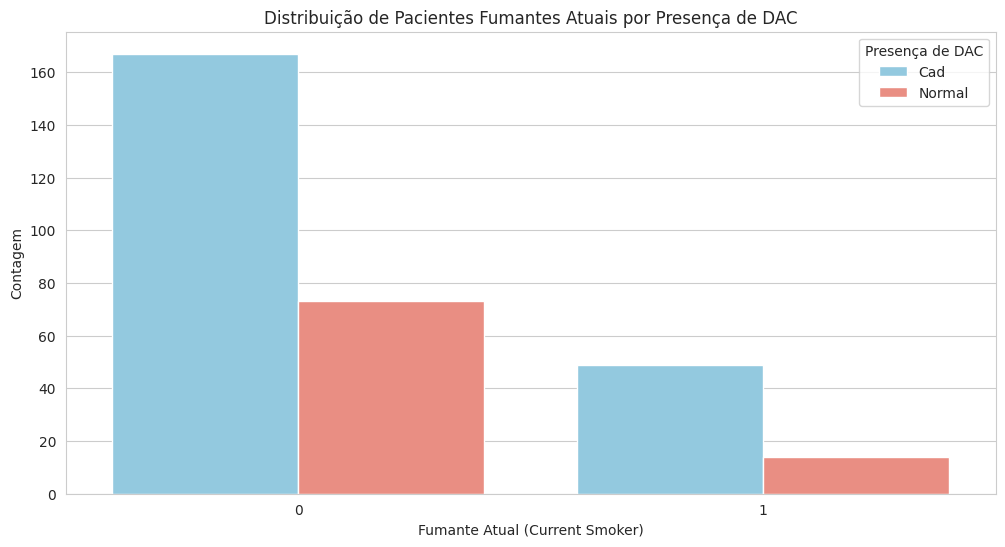

In [18]:
# Gráfico de barras para tabagismo atual (Current Smoker) em relação à presença de DAC
sns.countplot(data=data, x='Current Smoker', hue='Cath', palette=['skyblue', 'salmon'])
plt.title('Distribuição de Pacientes Fumantes Atuais por Presença de DAC')
plt.xlabel('Fumante Atual (Current Smoker)')
plt.ylabel('Contagem')
plt.legend(title='Presença de DAC')
plt.show()


* Entre os pacientes que são fumantes atuais (Current Smoker = Yes), a maioria tem DAC.
* Entre os pacientes que não são fumantes atuais (Current Smoker = No), a proporção daqueles com DAC é ainda maior.

Isso sugere que, embora o tabagismo seja um fator de risco conhecido para doenças cardíacas, neste conjunto de dados específico, uma proporção significativa de não fumantes também tem DAC. Portanto, outros fatores além do tabagismo podem estar desempenhando um papel significativo na presença de DAC neste conjunto de dados.


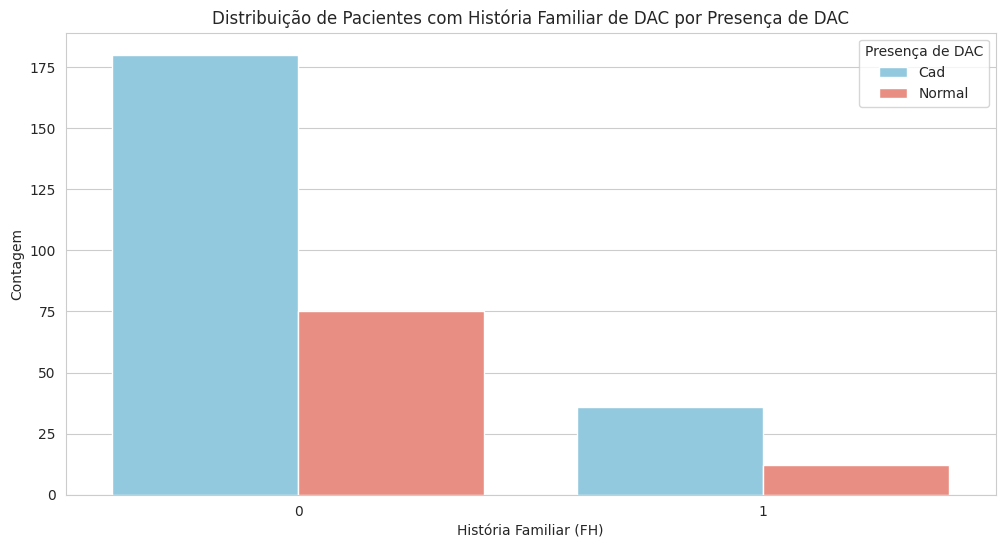

In [19]:
# Gráfico de barras para história familiar de DAC (FH) em relação à presença de DAC
sns.countplot(data=data, x='FH', hue='Cath', palette=['skyblue', 'salmon'])
plt.title('Distribuição de Pacientes com História Familiar de DAC por Presença de DAC')
plt.xlabel('História Familiar (FH)')
plt.ylabel('Contagem')
plt.legend(title='Presença de DAC')
plt.show()


* Entre os pacientes com uma história familiar de DAC (FH = Yes), uma proporção significativa tem DAC.
* Entre os pacientes sem história familiar de DAC (FH = No), a proporção daqueles com DAC é ainda maior.

Isso sugere que, embora a história familiar possa ser um indicador de risco, muitos pacientes sem essa história familiar também desenvolvem DAC. Portanto, a presença de outros fatores de risco pode ser mais predominante neste conjunto de dados.